In [1]:
%matplotlib inline 
import cv2
import skimage
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path
import tqdm

In [2]:
def read_image(img_path):
    img_bgr = cv2.imread(str(img_path))
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img

# hash

In [3]:
import imagehash

In [4]:
def hash(img):
    return imagehash.average_hash(img)

# calculate hashes

In [5]:
images_dir = Path('dataset/true/images/')
def is_image(image_path):
    p = str(image_path).lower()
    return p.endswith('jpg') or p.endswith('.png')
images_path = list(filter(is_image, images_dir.iterdir()))
len(images_path)

2102

In [6]:
def get_hash(image_path):
    img2 = read_image(image_path)
    return hash(Image.fromarray(img2))

In [7]:
hashes = [get_hash(str(image_path)) for image_path in tqdm.tqdm(images_path)]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:59<00:00, 35.39it/s]


# get closest

In [8]:
def show_result(img1, img2, diffs):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(2, 2, 1)
    plt.imshow(img1)
    plt.title('input')
    fig.add_subplot(2, 2, 2)
    plt.imshow(img2)
    plt.title('closest')
    fig.add_subplot(2, 1, 2)
    plt.hist(diffs, bins=np.arange(0, 50, 1))
    plt.title('distance distribution')
    plt.show()

In [9]:
def show_closest(img1_path):
    # read input image and calculate hash
    img1 = read_image(img1_path)
    hash1 = hash(Image.fromarray(img1))
    # calculate differences of hashes as distance
    diffs = [(hash2 - hash1) for hash2 in hashes]
    # find closest
    img2 = read_image(images_path[np.argmin(diffs)])
    # display result
    show_result(img1, img2, diffs)

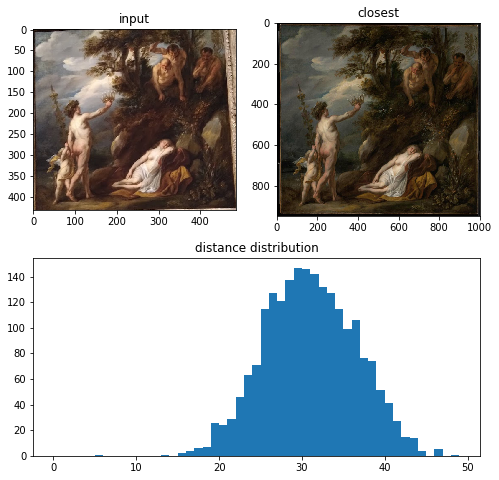

In [10]:
show_closest('dataset/test/images/Bacchus Discovering Ariadne.png')

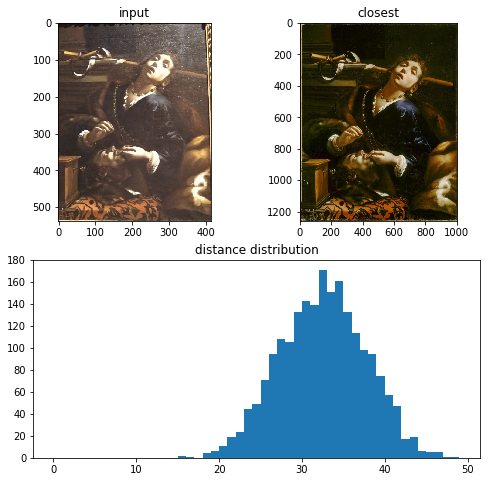

In [11]:
show_closest('dataset/test/images/Herodias with the Head of Saint John the Baptist.png')

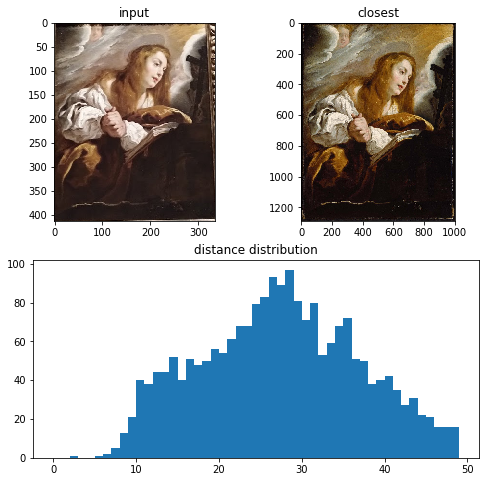

In [12]:
show_closest('dataset/test/images/Saint Mary Magdalen Penitent.png')